In [1]:
from flyins.models import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [3]:
obj_set = FlyIn.objects.filter(course__year=2018)

Histograma por día-hora ( 848 )


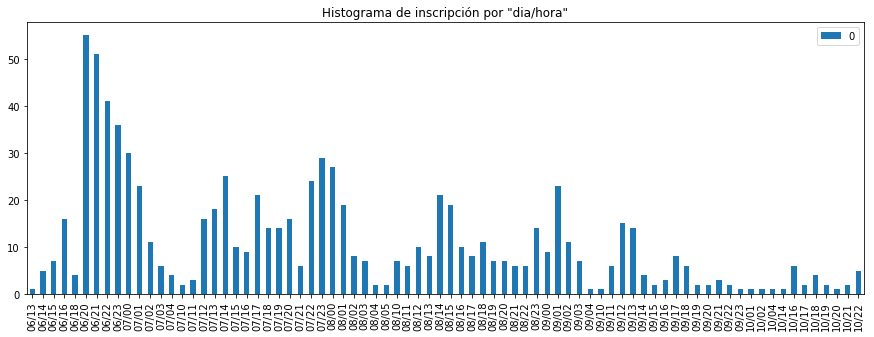

In [4]:
def filter_day_hour(pi):
    return pi.create_date.replace(second=0, microsecond=0, minute=0).strftime('%d/%H')

print("Histograma por día-hora (", obj_set.count(), ")")

timestamps = sorted(list(map(filter_day_hour, obj_set.all())))
timestamps_counter = Counter(timestamps)
timestamps_df = pd.DataFrame.from_dict(timestamps_counter, orient='index')
timestamps_df.plot(kind='bar', title='Histograma de inscripción por "dia/hora"')

# Histograma por Cursos

Histograma por cursos ( 848 )


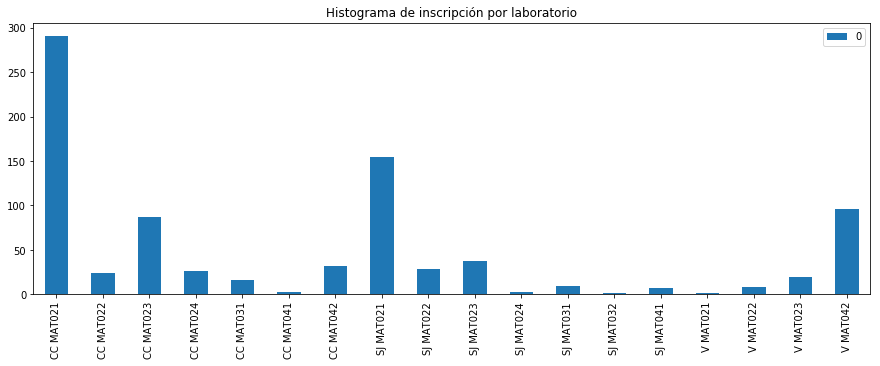

In [5]:
CAMPUS_CODES = {"Casa Central": "CC", "San Joaquín": "SJ", "Vitacura": "V"}

def filter_course_name(p):
    course_name = p.course.name.replace(" ", "").replace("-", "")
    return "%s %s" % (CAMPUS_CODES[p.course.campus.name], course_name)

print("Histograma por cursos (", obj_set.count(), ")")

courses = sorted(list(map(filter_course_name, obj_set.all())))
courses_counter = Counter(courses)
courses_df = pd.DataFrame.from_dict(courses_counter, orient='index')
courses_df.plot(kind='bar', title='Histograma de inscripción por laboratorio')

# Detección de repetidos

Se detectan estudiantes que ingresaron dos o más veces la misma pre-inscripción.

In [6]:
from IPython.display import display, HTML

rols = {}

def compare_instance(obj1, obj2):
    fields = obj1._meta.get_fields()

    df = pd.DataFrame()
    
    df['field'] = [f.name for f in fields]
    df['value1'] = [getattr(obj1, f.name) for f in fields]
    df['value2'] = [getattr(obj2, f.name) for f in fields]
    df['equality'] = [p1 == p2 for p1, p2 in zip(df['value1'], df['value2'])]

    display(HTML(df.to_html()))


for p in obj_set.all():
    fmt = "%s:%s" % (p.rol, p.course.pk)

    if fmt in rols:
        compare_instance(rols[fmt], p)
    else:    
        rols[fmt] = p

,field,value1,value2,equality
0,id,1144,1151,False
1,course,MAT 021 - Casa Central 2018-1,MAT 021 - Casa Central 2018-1,True
2,software,Mathematica,Mathematica,True
3,first_name,Bruno,Bruno,True
4,last_names,Navarrete,Navarrete,True
5,rol,201821010-2,201821010-2,True
6,usm_priority,0,0,True
7,parallel,15,15,True
8,previous_experience,False,False,True
9,create_date,2018-03-06 16:56:07.773273+00:00,2018-03-06 18:31:28.777337+00:00,False


,field,value1,value2,equality
0,id,1221,1233,False
1,course,MAT 021 - Casa Central 2018-1,MAT 021 - Casa Central 2018-1,True
2,software,Mathematica,Mathematica,True
3,first_name,Sofía,Sofía,True
4,last_names,Tapia Quiroz,Tapia Quiroz,True
5,rol,201851007-6,201851007-6,True
6,usm_priority,664,664,True
7,parallel,8,8,True
8,previous_experience,False,False,True
9,create_date,2018-03-06 21:00:39.140217+00:00,2018-03-06 21:06:39.832867+00:00,False


,field,value1,value2,equality
0,id,1429,1430,False
1,course,MAT 021 - San Joaquín 2018-1,MAT 021 - San Joaquín 2018-1,True
2,software,Mathematica,Mathematica,True
3,first_name,Diego André,Diego André,True
4,last_names,Guaringa Barrios,Guaringa Barrios,True
5,rol,201841519-7,201841519-7,True
6,usm_priority,719.6,719.6,True
7,parallel,212,212,True
8,previous_experience,False,False,True
9,create_date,2018-03-07 03:57:52.096242+00:00,2018-03-07 03:58:36.701201+00:00,False


,field,value1,value2,equality
0,id,1429,1431,False
1,course,MAT 021 - San Joaquín 2018-1,MAT 021 - San Joaquín 2018-1,True
2,software,Mathematica,Mathematica,True
3,first_name,Diego André,Diego André,True
4,last_names,Guaringa Barrios,Guaringa Barrios,True
5,rol,201841519-7,201841519-7,True
6,usm_priority,719.6,719.6,True
7,parallel,212,212,True
8,previous_experience,False,False,True
9,create_date,2018-03-07 03:57:52.096242+00:00,2018-03-07 03:59:16.793397+00:00,False
